In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

### 데이터 준비

In [2]:
num_data = 1000

x_1 = init.uniform_(torch.Tensor(num_data, 1), -5, 5)
noise_1 = init.normal_(torch.FloatTensor(num_data, 1), std = 2)

x_2 = init.uniform_(torch.Tensor(num_data, 1), -5, 5)
noise_2 = init.normal_(torch.FloatTensor(num_data, 1), std = 2)

y_1 = x_1**4 + x_1**2
y_1_noise = (x_1+noise_1)**4 + (x_1+noise_1)**2

y_2 = x_2**2 + x_2
y_2_noise = (x_2+noise_2)**2 + (x_2+noise_2)


### 선형회귀 모델 준비

In [3]:
model_1 = nn.Linear(1,1)

model_2 = nn.Linear(1,1)

loss_func = nn.MSELoss()

### 최적화 함수

In [4]:
learning_rate_1 = 0.01
learning_rate_2 = 0.01

optimizer_1 = optim.SGD(model_1.parameters(),lr=learning_rate_1)
optimizer_2 = optim.SGD(model_2.parameters(),lr=learning_rate_2)

### 학습 진행

In [5]:
label_1 = y_1_noise 

num_epoch_1 = 500

for i in range(num_epoch_1):
    optimizer_1.zero_grad()
    output_1 = model_1(x_1) 
    
    loss_1 = loss_func(output_1, label_1)  
    loss_1.backward() 
    optimizer_1.step() 
    
    if i%50==0:
        print(loss_1.data)
        
print(loss_1.data)

tensor(887661.)
tensor(773481.)
tensor(758273.6250)
tensor(756241.1875)
tensor(755969.5625)
tensor(755933.2500)
tensor(755928.4375)
tensor(755927.7500)
tensor(755927.6875)
tensor(755927.6875)
tensor(755927.6875)


In [6]:
label_2 = y_2_noise 

num_epoch_2 = 500

for i in range(num_epoch_2):
    optimizer_2.zero_grad()
    output_2 = model_2(x_2) 
    
    loss_2 = loss_func(output_2, label_2)  
    loss_2.backward() 
    optimizer_2.step() 
    
    if i%50==0:
        print(loss_2.data)
        
print(loss_2.data)

tensor(359.4841)
tensor(232.6510)
tensor(217.0349)
tensor(214.9627)
tensor(214.6877)
tensor(214.6512)
tensor(214.6464)
tensor(214.6458)
tensor(214.6457)
tensor(214.6457)
tensor(214.6457)


### 모델 검증

In [7]:
num_test_data = 1000

test_data_1 =init.uniform_(torch.Tensor(num_test_data, 1), -5, 5)
test_data_2 =init.uniform_(torch.Tensor(num_test_data, 1), -5, 5)


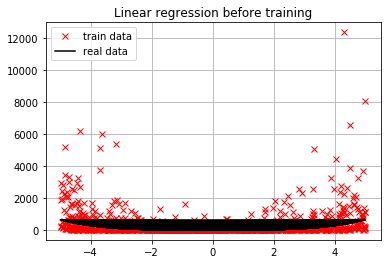

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_1.data, y_1_noise.data, 'rx')
plt.plot(x_1.data, y_1.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('Linear regression before training')
plt.grid(True)
plt.show()

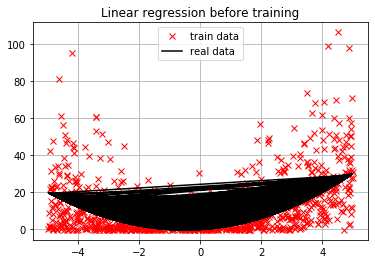

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_2.data, y_2_noise.data, 'rx')
plt.plot(x_2.data, y_2.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('Linear regression before training')
plt.grid(True)
plt.show()

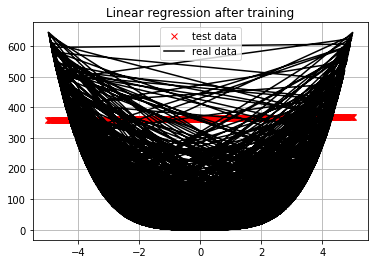

In [10]:
plt.plot(test_data_1.data, model_1(test_data_1).data, 'rx')
plt.plot(test_data_1.data, test_data_1**4+test_data_1**2, 'k-')
plt.legend(['test data', 'real data'])
plt.title('Linear regression after training')
plt.grid(True)
plt.show()

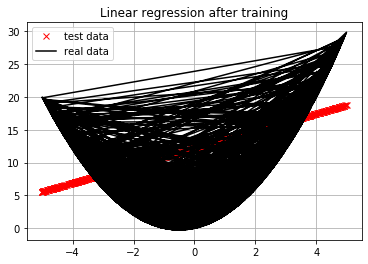

In [11]:
plt.plot(test_data_2.data, model_2(test_data_2).data, 'rx')
plt.plot(test_data_2.data, test_data_2**2+ test_data_2, 'k-')
plt.legend(['test data', 'real data'])
plt.title('Linear regression after training')
plt.grid(True)
plt.show()

In [12]:
### 모델 weight 확인하기

In [13]:
model_1.weight

Parameter containing:
tensor([[0.9959]], requires_grad=True)

In [14]:
model_2.weight

Parameter containing:
tensor([[1.3215]], requires_grad=True)